### Q1. Color nodes based on final split

Node club
Mr. Hi
Mr. Hi
Mr. Hi
Mr. Hi
Mr. Hi
Mr. Hi
Mr. Hi
Mr. Hi
Mr. Hi
Officer
Mr. Hi
Mr. Hi
Mr. Hi
Mr. Hi
Officer
Officer
Mr. Hi
Mr. Hi
Officer
Mr. Hi
Officer
Mr. Hi
Officer
Officer
Officer
Officer
Officer
Officer
Officer
Officer
Officer
Officer
Officer
Officer


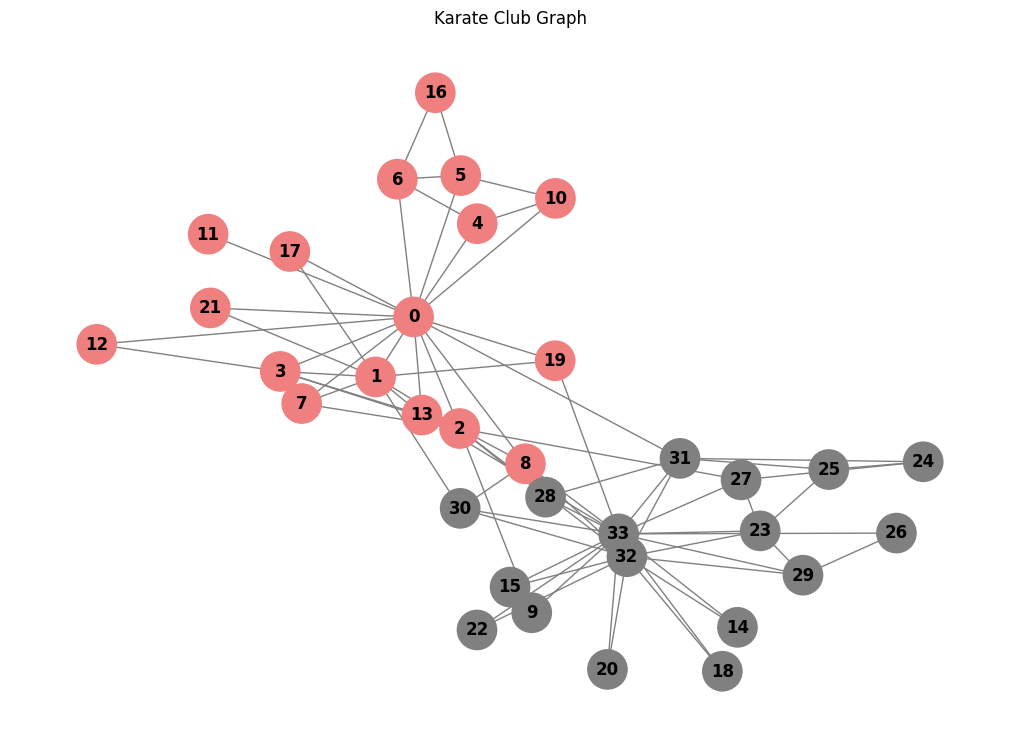

Number of nodes in Mr. Hi's faction: 17
Number of nodes in John A's faction: 17


In [8]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
print("Node club")
for v in G:
    print(G.nodes[v]["club"])

node_colors = ['lightcoral' if G.nodes[node]['club'] == 'Mr. Hi' else 'gray' for node in G.nodes()]

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos, with_labels=True, node_color=node_colors, node_size=800,
    font_color='black', font_weight='bold', edge_color='gray'
)
plt.title("Karate Club Graph")
plt.show()

# Count nodes in each faction
mr_hi_count = sum(1 for node in G.nodes if G.nodes[node]['club'] == 'Mr. Hi')
john_a_count = sum(1 for node in G.nodes if G.nodes[node]['club'] == 'Officer')

print(f"Number of nodes in Mr. Hi's faction: {mr_hi_count}")
print(f"Number of nodes in John A's faction: {john_a_count}")



### Q2. Use the Girvan-Newman algorithm to illustrate the split

Iteration 1: Removed edges [(0, 31)]


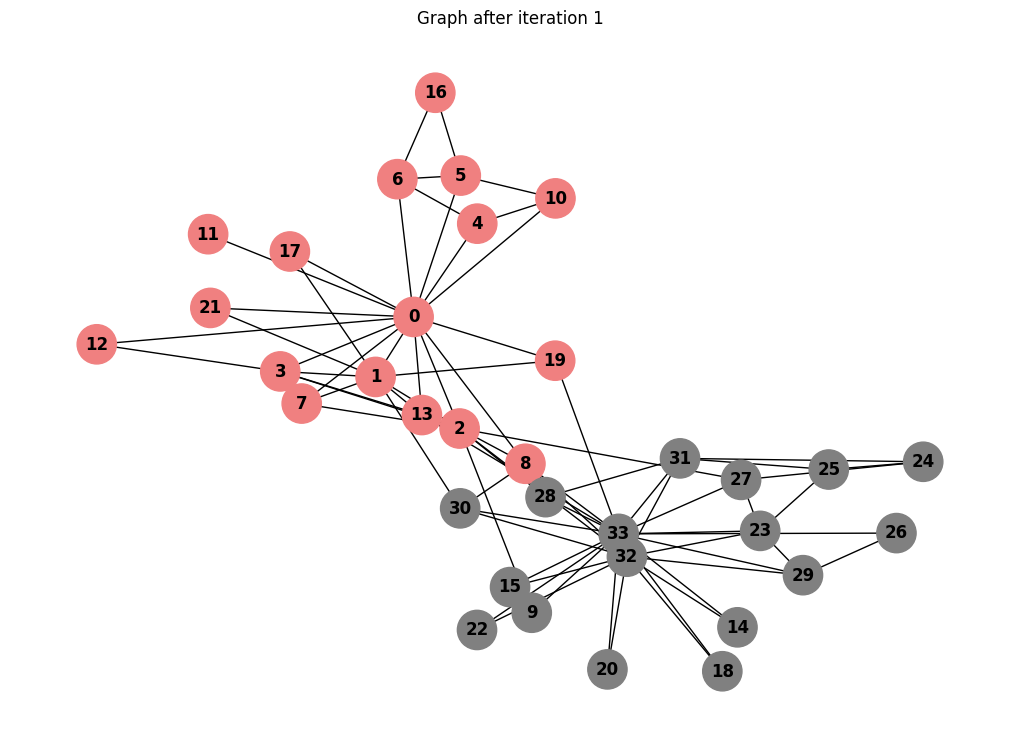

Iteration 2: Removed edges [(0, 2)]


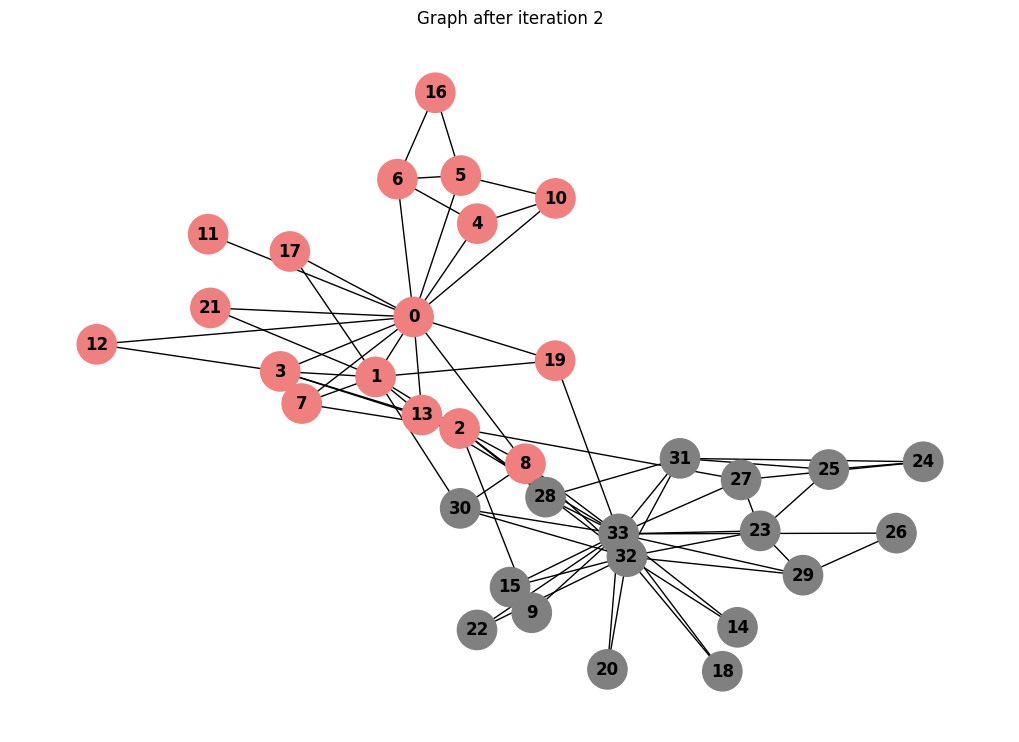

Iteration 3: Removed edges [(0, 8)]


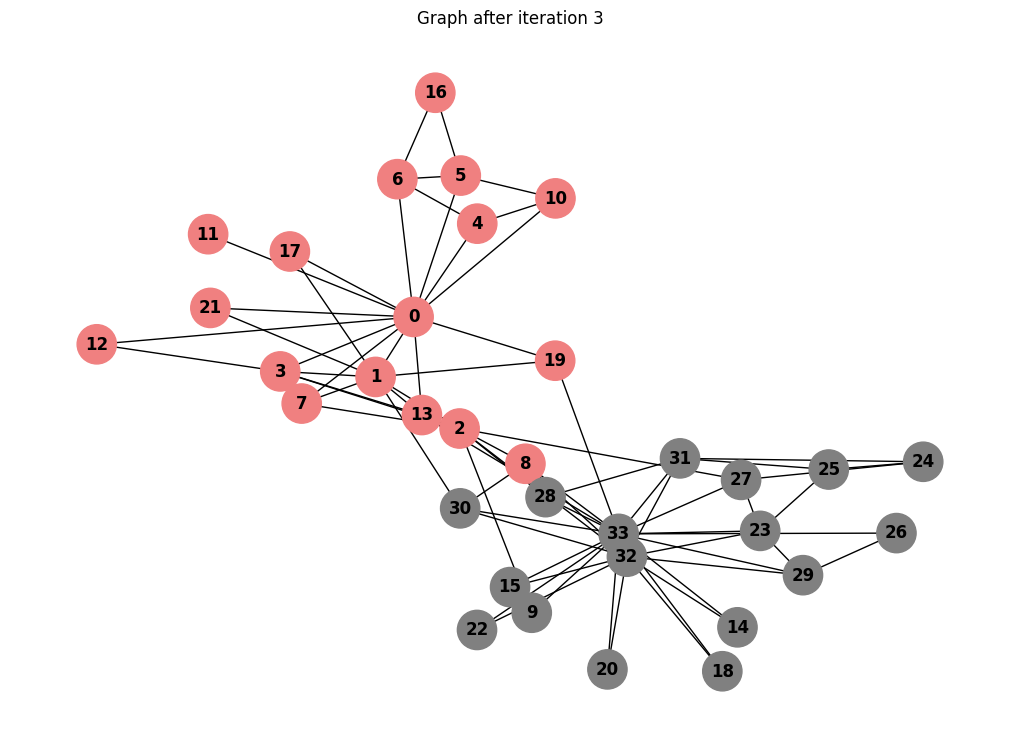

Iteration 4: Removed edges [(13, 33)]


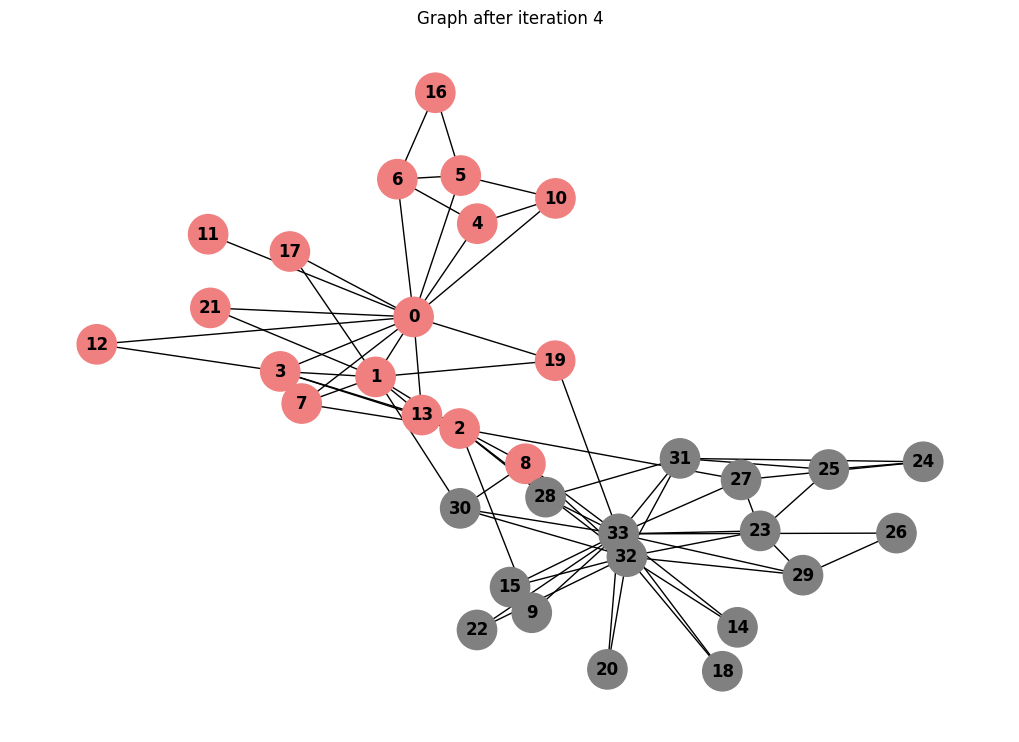

Iteration 5: Removed edges [(19, 33)]


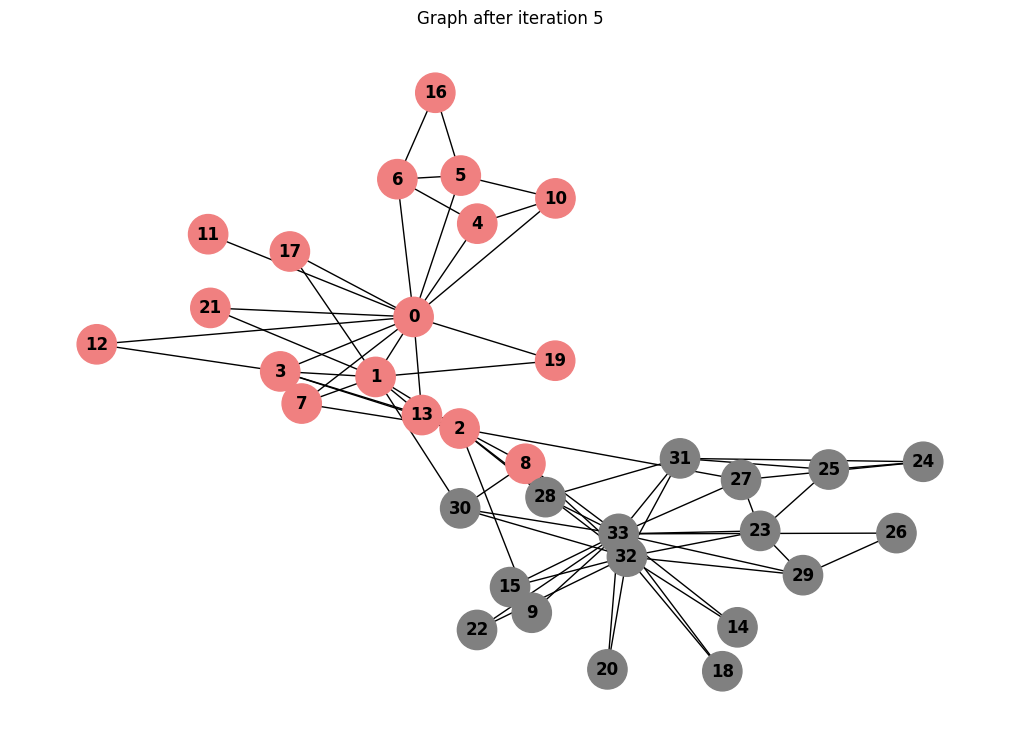

Iteration 6: Removed edges [(2, 32)]


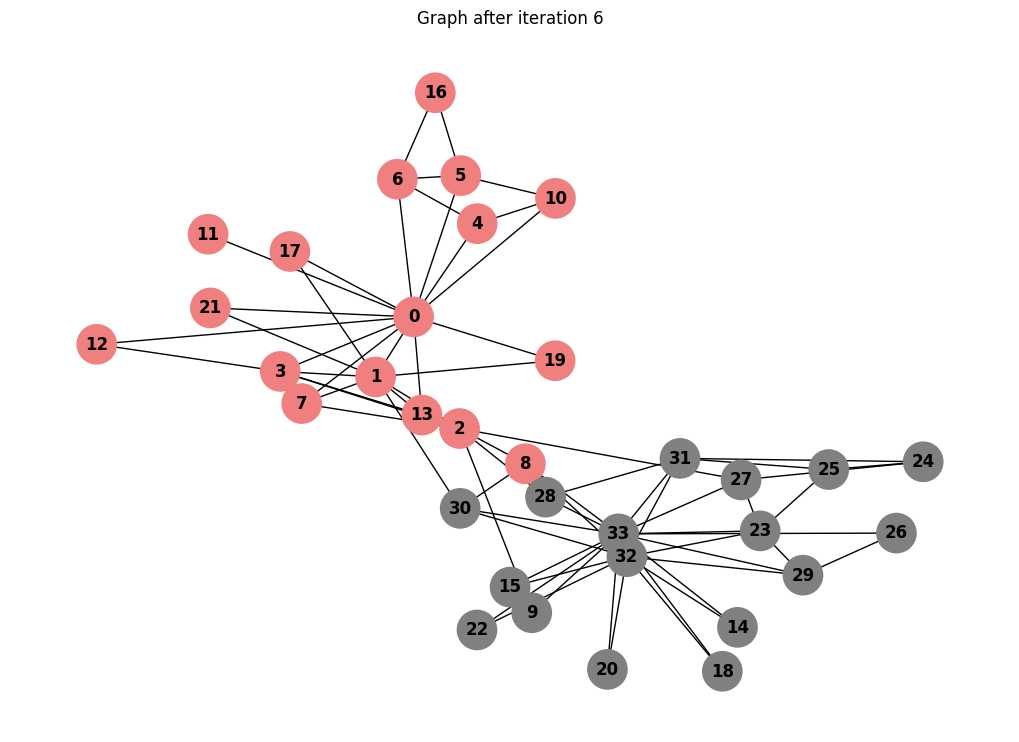

Iteration 7: Removed edges [(1, 30)]


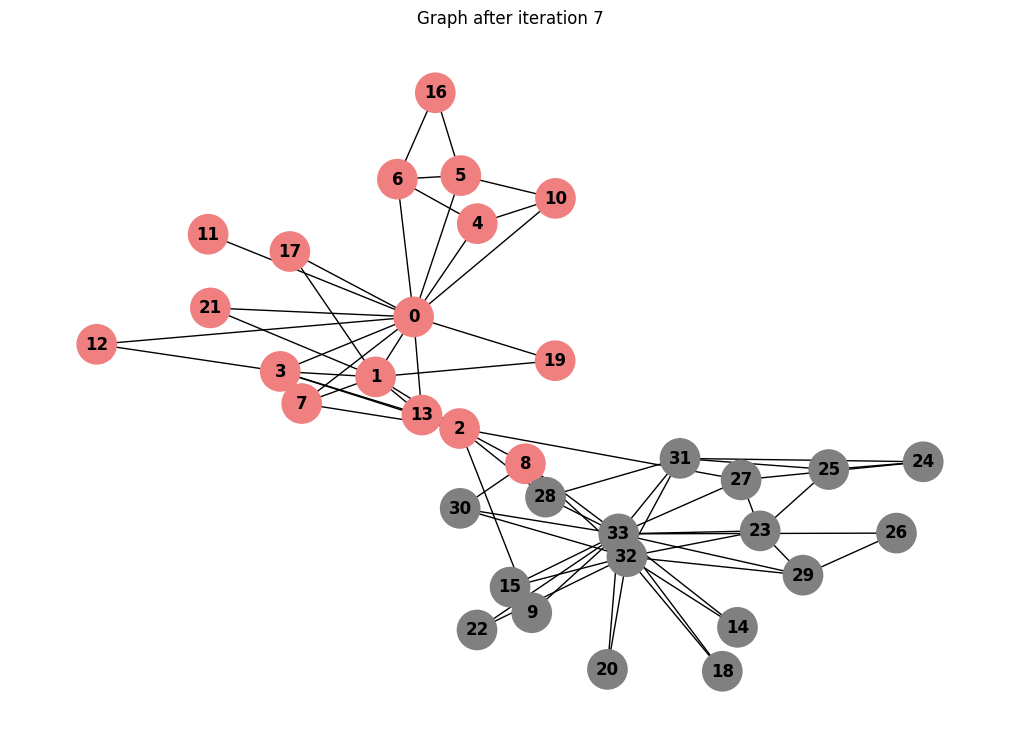

Iteration 8: Removed edges [(1, 2)]


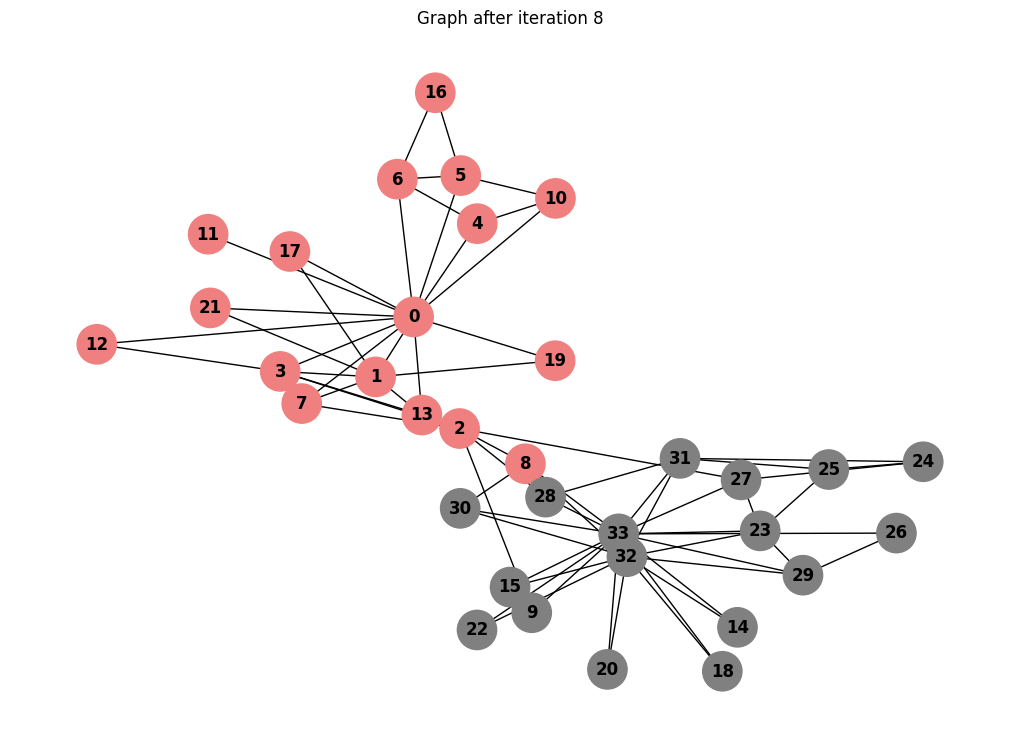

Iteration 9: Removed edges [(2, 3)]


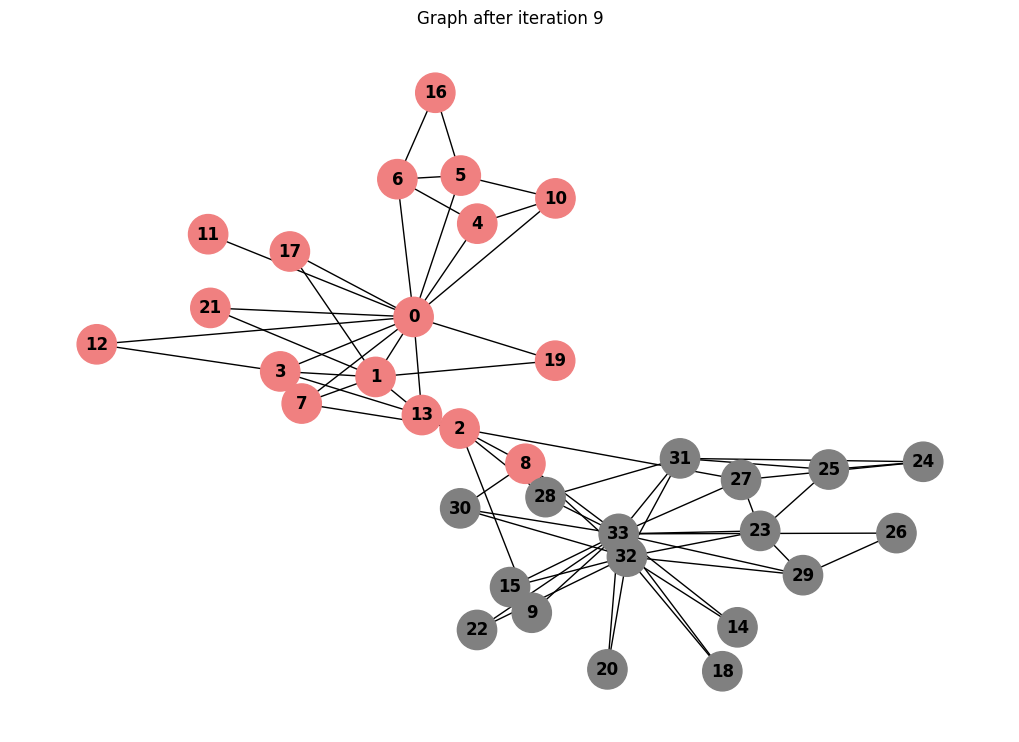

Iteration 10: Removed edges [(2, 7), (2, 13)]


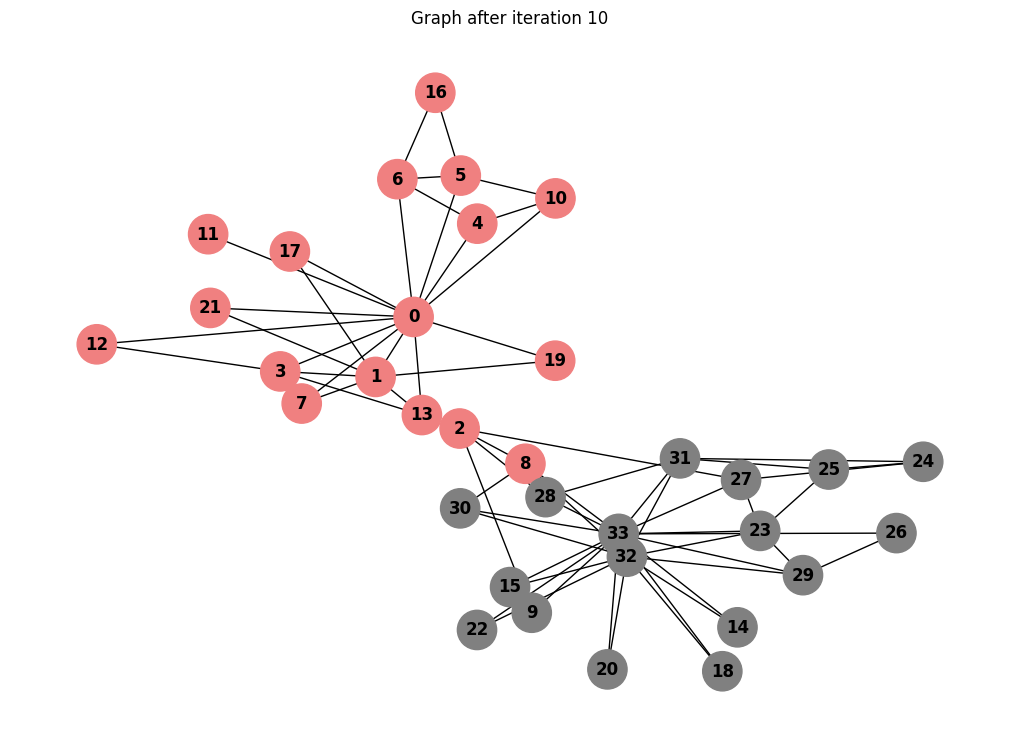

The graph split into 2 components after 10 iterations.
Component 1: {0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}
Component 2: {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


In [15]:
import networkx as nx
import matplotlib.pyplot as plt

def girvan_newman(graph):
    G = graph.copy()
    iteration = 0

    def draw_graph(G, pos, iteration):
        plt.figure(figsize=(10, 7))
        nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, font_color="black", font_weight="bold")
        plt.title(f"Graph after iteration {iteration}")
        plt.show()

    pos = nx.spring_layout(G, seed=42)

    while nx.number_connected_components(G) == 1:
        iteration += 1
        edge_betweenness = nx.edge_betweenness_centrality(G)
        max_betweenness = max(edge_betweenness.values())
        edges_to_remove = [edge for edge, centrality in edge_betweenness.items() if centrality == max_betweenness]
        
        G.remove_edges_from(edges_to_remove)
        print(f"Iteration {iteration}: Removed edges {edges_to_remove}")
        
        draw_graph(G, pos, iteration)

    return iteration, list(nx.connected_components(G))

G = nx.karate_club_graph()

node_colors = ['lightcoral' if G.nodes[node]['club'] == 'Mr. Hi' else 'grey' for node in G.nodes()]

iterations, components = girvan_newman(G)

print(f"The graph split into {len(components)} components after {iterations} iterations.")
for i, component in enumerate(components, 1):
    print(f"Component {i}: {component}")
